<a href="https://colab.research.google.com/github/UlyanaAt/neural-networks/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
###Выполнила: Атанова Ульяна, гр.932004

Датасет: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [455]:
import matplotlib.pyplot as plt

from pandas import (
    DataFrame,
    read_csv,
)
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_score,
    recall_score,
    accuracy_score,
)
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
)
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [456]:
df: DataFrame = read_csv('/content/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [457]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [459]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [460]:
X: DataFrame = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

match_dict = {1: 0, 2: 1, 3: 2}
y = y.map(match_dict)

In [461]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [462]:
X1, X_, y1, y_ = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=45
)
X2, X3, y2, y3 = train_test_split(
    X_,
    y_,
    stratify=y_,
    test_size=0.5,
    random_state=46
)

print(f'Train : {X1.shape}, Test : {X2.shape}, Val: {X3.shape}')

Train : (1700, 21), Test : (213, 21), Val: (213, 21)


In [463]:
y1 = to_categorical(y1)
y2 = to_categorical(y2)
y3 = to_categorical(y3)

In [464]:
y1

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [465]:
classifier = Sequential()
classifier.add(
    Dense(
        128,
        activation='relu',
        input_dim=X1.shape[1],
    )
)
classifier.add(
    Dense(
        8,
        activation='relu',
    )
)
classifier.add(
    Dense(
        4,
        activation='sigmoid',
    )
)
classifier.add(
    Dense(
        3,
        activation='softmax',
    )
)
classifier.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 128)               2816      
                                                                 
 dense_74 (Dense)            (None, 8)                 1032      
                                                                 
 dense_75 (Dense)            (None, 4)                 36        
                                                                 
 dense_76 (Dense)            (None, 3)                 15        
                                                                 
Total params: 3899 (15.23 KB)
Trainable params: 3899 (15.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [466]:
classifier.compile(
    loss='categorical_crossentropy',
    optimizer='RMSprop',
    metrics='accuracy',
)

In [467]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    verbose=1,
)
checkpoint = ModelCheckpoint(
    '/content/checkFile.hdf5',
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True,
)
callbacks_list: list = [early_stop, checkpoint]

In [468]:
classifier_history = classifier.fit(
    X1,
    y1,
    batch_size=100,
    validation_data=(X3, y3),
    callbacks=callbacks_list,
    epochs=90,
)

Epoch 1/90
15/17 [=========================>....] - ETA: 0s - loss: 1.0636 - accuracy: 0.3193 
Epoch 1: val_accuracy improved from -inf to 0.76995, saving model to /content/checkFile.hdf5
17/17 [==============================] - 1s 21ms/step - loss: 1.0538 - accuracy: 0.3747 - val_loss: 0.9736 - val_accuracy: 0.7700
Epoch 2/90
16/17 [===========================>..] - ETA: 0s - loss: 0.9290 - accuracy: 0.7788
Epoch 2: val_accuracy improved from 0.76995 to 0.77934, saving model to /content/checkFile.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 0.9269 - accuracy: 0.7782 - val_loss: 0.8813 - val_accuracy: 0.7793
Epoch 3/90
 1/17 [>.............................] - ETA: 0s - loss: 0.8523 - accuracy: 0.8300

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/17 [====================>.........] - ETA: 0s - loss: 0.8632 - accuracy: 0.7742
Epoch 3: val_accuracy did not improve from 0.77934
17/17 [==============================] - 0s 7ms/step - loss: 0.8502 - accuracy: 0.7782 - val_loss: 0.8174 - val_accuracy: 0.7793
Epoch 4/90
17/17 [==============================] - ETA: 0s - loss: 0.7946 - accuracy: 0.7782
Epoch 4: val_accuracy did not improve from 0.77934
17/17 [==============================] - 0s 7ms/step - loss: 0.7946 - accuracy: 0.7782 - val_loss: 0.7713 - val_accuracy: 0.7793
Epoch 5/90
 1/17 [>.............................] - ETA: 0s - loss: 0.7968 - accuracy: 0.7500
Epoch 5: val_accuracy did not improve from 0.77934
17/17 [==============================] - 0s 6ms/step - loss: 0.7562 - accuracy: 0.7782 - val_loss: 0.7397 - val_accuracy: 0.7793
Epoch 6/90
 1/17 [>.............................] - ETA: 0s - loss: 0.7352 - accuracy: 0.7800
Epoch 6: val_accuracy did not improve from 0.77934
17/17 [==============================] - 0s 

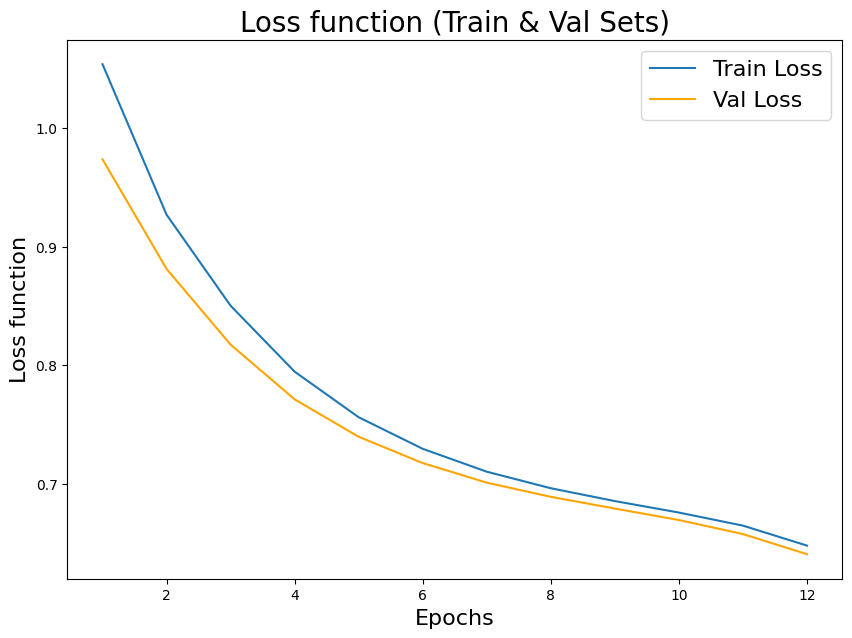

In [469]:
loss_function = classifier_history.history['loss']
val_loss_function = classifier_history.history['val_loss']
epochs = range(
    1,
    len(loss_function) + 1,
)

plt.rcParams['figure.figsize'] = [10, 7]
plt.title('Loss function (Train & Val Sets)', fontsize=20)
plt.plot(
    epochs,
    loss_function,
    label='Train Loss',
)
plt.plot(
    epochs,
    val_loss_function,
    color='orange',
    label='Val Loss',
)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss function', fontsize=16)
plt.legend(fontsize=16)
plt.show()

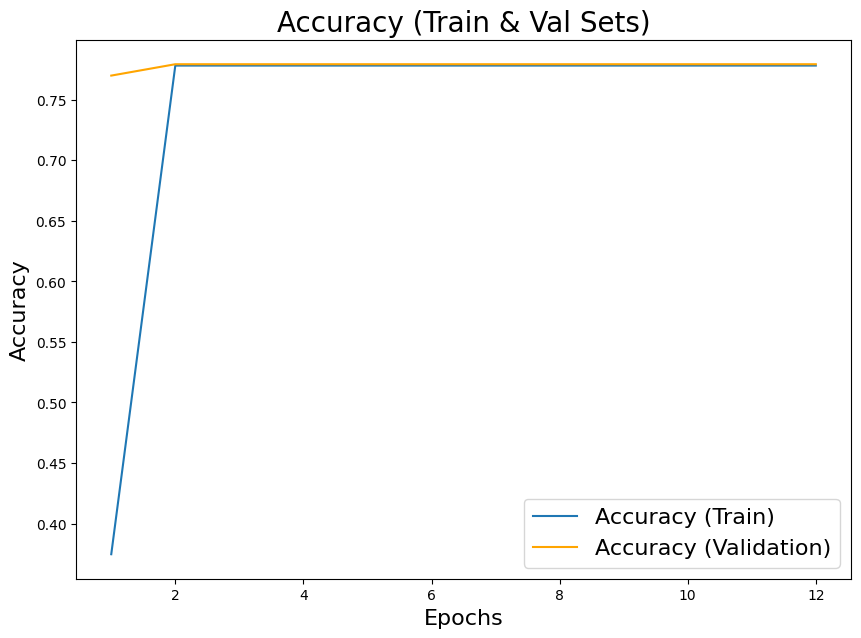

In [470]:
acc = classifier_history.history['accuracy']
val_acc = classifier_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.title('Accuracy (Train & Val Sets)', fontsize=20)
plt.plot(
    epochs,
    acc,
    label='Accuracy (Train)'
)
plt.plot(
    epochs,
    val_acc,
    color='orange',
    label='Accuracy (Validation)'
)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [471]:
classifier.load_weights('/content/checkFile.hdf5')

results = classifier.evaluate(
    X2,
    y2,
    return_dict=True,
)

y_pred = classifier.predict(X2)

print(results)

7/7 [==============================] - 0s 3ms/step
{'loss': 0.8794829249382019, 'accuracy': 0.7793427109718323}


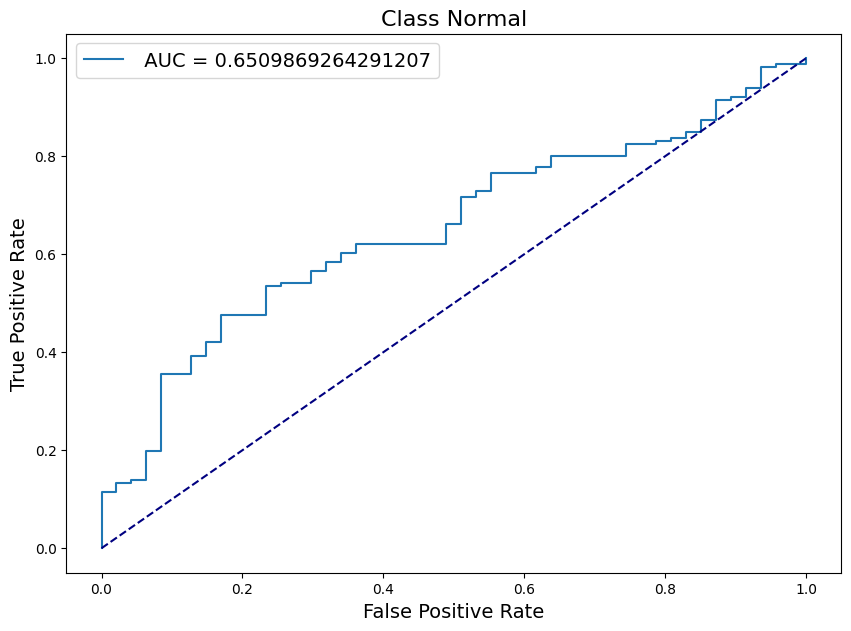

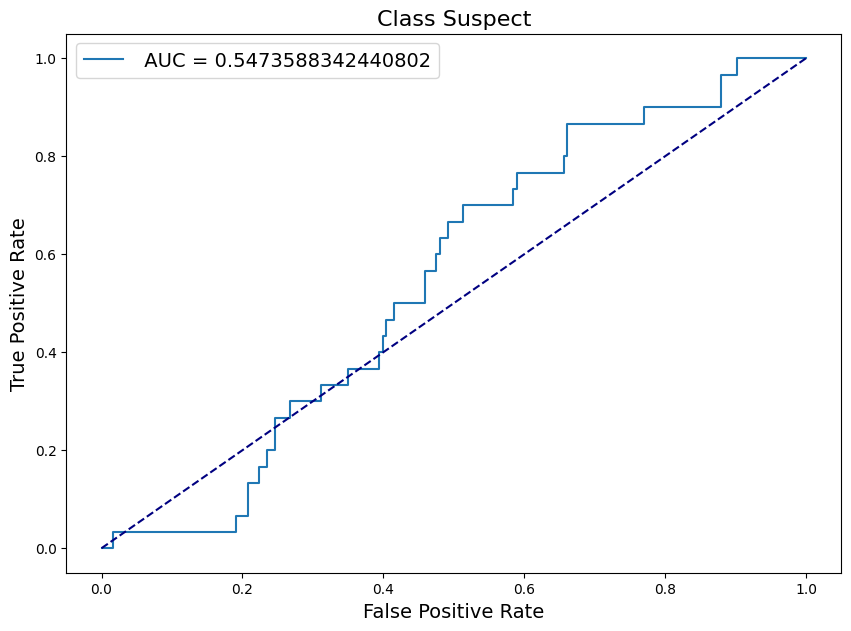

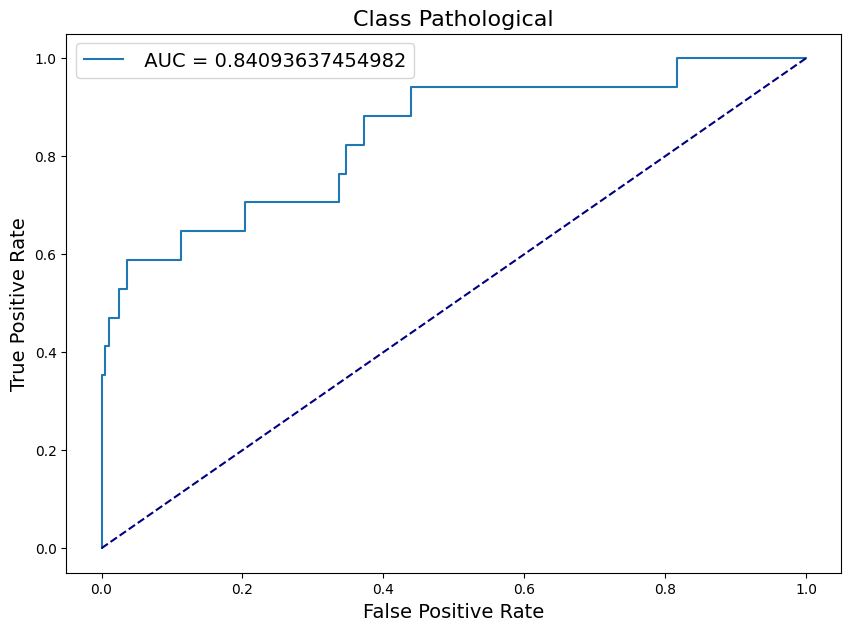

In [472]:
classes: list = ['Normal', 'Suspect', 'Pathological']
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(
        y2[:, i],
        y_pred[:, i]
    )
    roc_auc[i] = auc(
        fpr[i],
        tpr[i]
    )

for i in range(len(classes)):
    plt.plot(
        fpr[i],
        tpr[i],
        label=" AUC = " + str(roc_auc[i]),
    )
    plt.plot(
        [0, 1],
        [0, 1],
        color='navy',
        linestyle='--',
    )
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f"Class {classes[i]}", fontsize=16)
    plt.legend(fontsize=14)
    plt.show()

In [473]:
y_pred = (y_pred >= 0.5).astype(int)

In [474]:
for i in range(len(classes)):
    print(f"\nClass {classes[i]}")
    print(f"Precision: {precision_score(y2[:, i], y_pred[:, i], zero_division=1)}")
    print(f"Recall: {recall_score(y2[:, i], y_pred[:, i])}")
    print(f"Normalized accuracy: {accuracy_score(y2[:, i], y_pred[:, i])}")


Class Normal
Precision: 1.0
Recall: 0.0
Normalized accuracy: 0.22065727699530516

Class Suspect
Precision: 1.0
Recall: 0.0
Normalized accuracy: 0.8591549295774648

Class Pathological
Precision: 1.0
Recall: 0.0
Normalized accuracy: 0.92018779342723
